In [1]:
import os
import numpy as np
import pandas as pd
import librosa

import matplotlib.pyplot as plt

(128, 517)
(128, 517)
(128, 517)


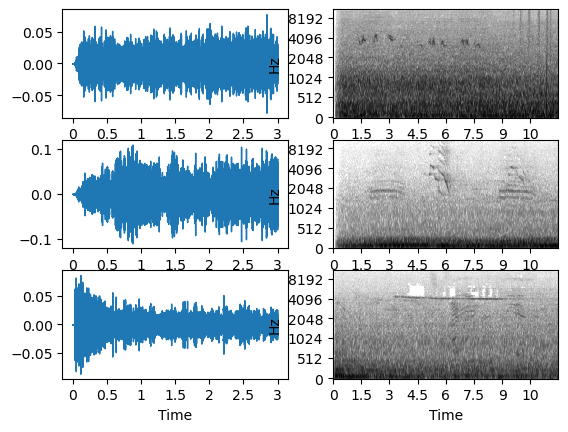

In [7]:
external_bird_dir = os.path.join(os.getcwd(), 'test_birds')
test_files = [os.path.join(external_bird_dir, f"test{i}.mp3") for i in range(1, 4)]
y = []
sr = []
fig, axes = plt.subplots(nrows=3, ncols=2)
for i, file in enumerate(test_files):
    yi, sri = librosa.load(file, duration=3) # all of the files seemed to have birds within 3 second
    y.append(yi)
    sr.append(sri)
    librosa.display.waveshow(yi, sr=sri, ax=axes[i, 0])
    spec = librosa.feature.melspectrogram(y=yi, sr=sri, hop_length=128, win_length=512)
    spec_db = librosa.power_to_db(spec, ref=np.max)
    librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sri, cmap='gray_r', ax=axes[i,1])
    print(spec_db.shape)

In [10]:
birdspecs = np.zeros((128, 517, 3))
np_file = os.path.join(os.getcwd(), 'output', 'preprocessing', 'test_birds.npy')
i = 0
for file in test_files:
    yi, sri = librosa.load(file, duration=3)
    spec = librosa.feature.melspectrogram(y=yi, sr=sri, hop_length=128, win_length=512)
    spec_db = librosa.power_to_db(spec, ref=np.max)
    birdspecs[:,:,i] = spec_db
    # print(species, i, spec_db.shape)
    i+=1
np.save(np_file, birdspecs)
